In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
import tensorflow as tf
tf.reset_default_graph()
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('mnist/', one_hot=True)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


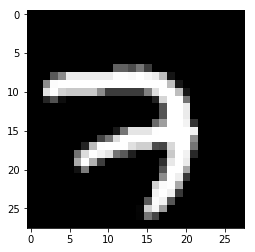

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(mnist.train.images[0].reshape(28,28), cmap = 'gray')

In [52]:
ruido_ph = tf.placeholder(tf.float32,[None, 100])

In [53]:
import numpy as np

In [54]:
def gerador(ruido, reuse = None):
    with tf.variable_scope('gerador', reuse = reuse):
        #100 -> 128 -> 128 -> 784
        camada_oculta1 = tf.nn.relu(tf.layers.dense(inputs = ruido, units=128))
        camada_oculta2 = tf.nn.relu(tf.layers.dense(inputs=camada_oculta1, units=128))
        camada_saida = tf.layers.dense(inputs = camada_oculta2, units = 784, activation = tf.nn.tanh)
        return camada_saida

In [55]:
imagens_reais_ph = tf.placeholder(tf.float32, [None, 784])

In [56]:
def discriminador(X, reuse = None):
    with tf.variable_scope('discriminador', reuse = reuse):
        # 784 -> 128 -> 128 -> 1
        camada_oculta1 = tf.nn.relu(tf.layers.dense(inputs = X, units = 128))
        camada_oculta2 = tf.nn.relu(tf.layers.dense(inputs = camada_oculta1, units = 128))
        logits = tf.layers.dense(camada_oculta2, units=1)
        return logits

In [57]:
logits_imagens_reais = discriminador(imagens_reais_ph)
logits_imagens_ruido = discriminador(gerador(ruido_ph), reuse = True)

erro_discriminador_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits_imagens_reais,
                                                                                labels = tf.ones_like(logits_imagens_reais)*(0.9)))

erro_discriminador_ruido = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits_imagens_ruido,
                                                                                 labels = tf.zeros_like(logits_imagens_ruido)))

erro_discriminador = erro_discriminador_real + erro_discriminador_ruido

erro_gerador = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits_imagens_ruido,
                                                                     labels = tf.ones_like(logits_imagens_ruido)))

In [58]:
variaveis = tf.trainable_variables()

In [59]:
variaveis_discriminador = [v for v in variaveis if 'discriminador' in v.name]

In [60]:
variaveis_gerador = [v for v in variaveis if 'gerador' in v.name]

In [61]:
treinamento_discriminador = tf.train.AdamOptimizer(learning_rate=0.001).minimize(erro_discriminador,
                                                                                var_list = variaveis_discriminador)
treinamento_gerador = tf.train.AdamOptimizer(learning_rate=0.001).minimize(erro_gerador, var_list=variaveis_gerador)

In [62]:
batch_size =  100
amostras_teste = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    #ruido_teste = np.random.uniform(-1, 1, size =(1,100))
    #amostra = sess.run(gerador(ruido_ph, reuse=True), feed_dict = {ruido_ph: ruido_teste})
    
#     batch = mnist.train.next_batch(100)
#     imagens_batch = batch[0].reshape((100, 784))
#     imagens_batch = imagens_batch*2 - 1
#     r = sess.run(discriminador(imagens_reais_ph, True), feed_dict = {imagens_reais_ph: imagens_batch})
    
    for epoca in range(50):
        numero_batches = mnist.train.num_examples // batch_size
        for i in range(numero_batches):
            batch = mnist.train.next_batch(batch_size)
            imagens_batch = batch[0].reshape((batch_size,784))
            imagens_batch = imagens_batch * 2 - 1
    
            batch_ruido = np.random.uniform(-1, 1, size=(batch_size,100))
        
            _, custod = sess.run([treinamento_discriminador, erro_discriminador],
                                  feed_dict  = {imagens_reais_ph: imagens_batch, ruido_ph: batch_ruido})
            
            _, custog = sess.run([treinamento_gerador, erro_gerador], feed_dict = {ruido_ph: batch_ruido})
            
        print('época: ' + str(epoca + 1) + ' erro D: '+str(custod)+' erro G: '+str(custog))
        
        ruido_teste = np.random.uniform(-1, 1, size=(1,100))
        imagem_gerada = sess.run(gerador(ruido_ph, reuse = True), feed_dict={ruido_ph: ruido_teste})
        
        amostras_teste.append(imagem_gerada)

época: 1 erro D: 0.42174077 erro G: 5.008218


época: 2 erro D: 0.59510183 erro G: 6.819207


época: 3 erro D: 0.6584132 erro G: 4.978242


época: 4 erro D: 0.89713264 erro G: 2.9563706


época: 5 erro D: 0.436499 erro G: 14.730956


época: 6 erro D: 1.0583754 erro G: 9.3351755


época: 7 erro D: 1.0391641 erro G: 1.4149503


época: 8 erro D: 1.2145292 erro G: 1.4001474


época: 9 erro D: 0.44974735 erro G: 3.2471235


época: 10 erro D: 1.5621028 erro G: 1.33652


época: 11 erro D: 1.04818 erro G: 5.2835994


época: 12 erro D: 1.6439204 erro G: 1.4899738


época: 13 erro D: 0.8421383 erro G: 2.6511543


época: 14 erro D: 1.7436097 erro G: 3.2919466


época: 15 erro D: 1.0677248 erro G: 1.6503983


época: 16 erro D: 1.1072657 erro G: 2.4595175


época: 17 erro D: 1.1228931 erro G: 1.65583


época: 18 erro D: 0.45593914 erro G: 6.8301406


época: 19 erro D: 1.0074581 erro G: 6.7516828


época: 20 erro D: 1.0110457 erro G: 2.4854589


época: 21 erro D: 0.85081047 erro G: 4.4383616


época: 22 erro D: 1.13426 erro G: 1.390026


época: 23 erro D: 1.311164 erro G: 1.3861862


época: 24 erro D: 0.93433046 erro G: 3.2176547


época: 25 erro D: 0.7301048 erro G: 5.1645055


época: 26 erro D: 1.1887121 erro G: 2.2656248


época: 27 erro D: 1.5274905 erro G: 1.9702481


época: 28 erro D: 0.90067935 erro G: 2.5001853


época: 29 erro D: 0.7711115 erro G: 2.9486008


época: 30 erro D: 1.6898777 erro G: 1.3554964


época: 31 erro D: 1.0013336 erro G: 2.094472


época: 32 erro D: 0.7984372 erro G: 2.8004792


época: 33 erro D: 1.0246059 erro G: 3.180105


época: 34 erro D: 0.7968139 erro G: 2.3525546


época: 35 erro D: 1.0154802 erro G: 1.8138213


época: 36 erro D: 1.2303473 erro G: 2.318201


época: 37 erro D: 1.09575 erro G: 1.6336387


época: 38 erro D: 0.83065116 erro G: 3.251273


época: 39 erro D: 0.8935282 erro G: 2.5359888


época: 40 erro D: 0.75288117 erro G: 2.3698478


época: 41 erro D: 0.94566005 erro G: 2.934958


época: 42 erro D: 0.93659973 erro G: 1.8872437


época: 43 erro D: 0.99026394 erro G: 2.0278835


época: 44 erro D: 0.79767054 erro G: 2.4614496


época: 45 erro D: 0.9276883 erro G: 2.1121361


época: 46 erro D: 1.0403627 erro G: 1.5667546


época: 47 erro D: 0.90947413 erro G: 2.6368167


época: 48 erro D: 0.88643104 erro G: 2.9238906


época: 49 erro D: 0.9479408 erro G: 1.8865631


época: 50 erro D: 0.9025185 erro G: 2.3176336


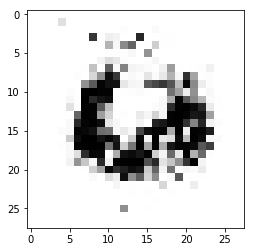

In [64]:
plt.imshow(amostras_teste[49].reshape(28,28), cmap = 'Greys')